## 使用梯度上升法实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
# 特征2与特征1有比较明显的线性关系
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

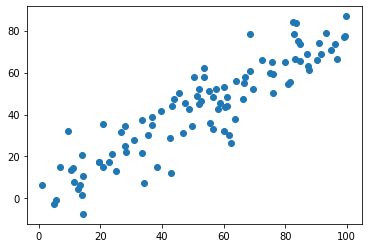

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    # 每一个特征对应的平均值。行方向的均值，也就是每一列的均值。求出来的是1*n的均值
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

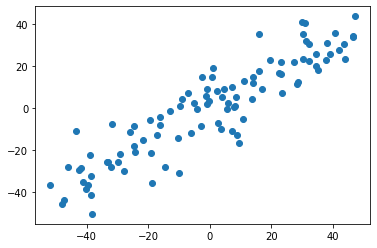

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

2.415845301584341e-15

In [8]:
np.mean(X_demean[:,1])

1.7408297026122456e-14

### 梯度上升法

In [9]:
def f(w, X):
    # 目标函数
    # 数据已经归零化了，所以直接点乘即可
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# PCA的梯度上升法的时候，w是一个方向向量，模为1.所以所有方向上w的数值都很小，epsilon最好也设置小一点
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

# 给定一个w向量，求w的单位向量
# 就是用向量除以其模
# np中的linalg(线性代数包)中的norm(模)
# 推到的公式中w为1，所以每一次都要将w归成单位向量
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    # 每一次从都要将w标准化！
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [10]:
# w如果为0的化每一次计算出来的都是0
# 0的地方就是极小值
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始
initial_w

array([0.99824381, 0.63660264])

In [11]:
eta = 0.001
# 注意3： PCA不能使用StandardScaler标准化数据
# 如果将样本进行了标准化，那么样本的方差信息就被抹去了。PCA需要计算的就是方差最大的搜索
# PCA已经完成了标准化的一半，也就是demean

In [12]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.76786348, 0.64061351])

In [13]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.76786348, 0.64061351])

In [14]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

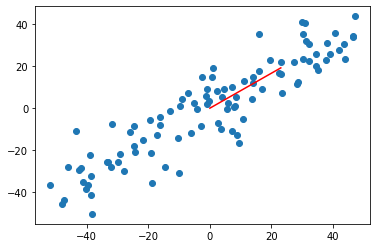

In [15]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()
# 这跟直线就是所求的方向
# 这个轴就是主成分。第一个求出来的就叫做第一主成分

### 使用极端数据集测试

In [16]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

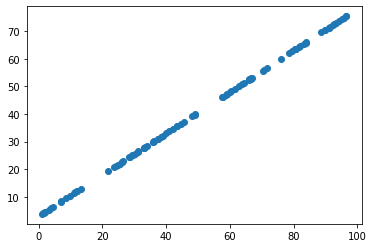

In [17]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [18]:
X2_demean = demean(X2)

In [21]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
print(w2)
# 0.8, 0.6的斜率就是0.75

[0.80000043 0.59999943]


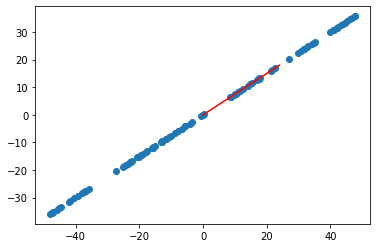

In [20]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

同学们可以自己思考实现随机梯度下降法和小批量梯度下降法的版本：）